In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress


In [2]:
from google.colab import drive
drive.mount('/content/drive')#located on the google drive file

Mounted at /content/drive


In [3]:
P1_data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Participant-01.csv", sep=",")#read the data use pandas
P1_data 

,Start,Finish,Steps (count)
0,31-Dec-2021 23:00,01-Jan-2022 00:00,0.000000
1,01-Jan-2022 00:00,01-Jan-2022 01:00,0.000000
2,01-Jan-2022 01:00,01-Jan-2022 02:00,0.000000
3,01-Jan-2022 02:00,01-Jan-2022 03:00,0.000000
4,01-Jan-2022 03:00,01-Jan-2022 04:00,0.000000
...,...,...,...
5862,02-Sep-2022 04:00,02-Sep-2022 05:00,9.000000
5863,02-Sep-2022 05:00,02-Sep-2022 06:00,0.000000
5864,02-Sep-2022 06:00,02-Sep-2022 07:00,410.584935
5865,02-Sep-2022 07:00,02-Sep-2022 08:00,1153.415065


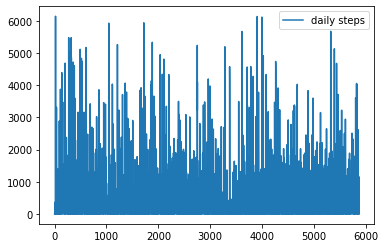

In [4]:
y = P1_data['Steps (count)']
# x = np.linspace(0,6133)
plt.plot(y,label = 'daily steps')
plt.legend()
plt.show()#draw the plot and brief look at the visualision of data

In [5]:
P1_data['Steps (count)'].fillna(0,inplace = True)
data01 = P1_data.drop(['Start'],axis = 1)#select the column that needed 
data01

,Finish,Steps (count)
0,01-Jan-2022 00:00,0.000000
1,01-Jan-2022 01:00,0.000000
2,01-Jan-2022 02:00,0.000000
3,01-Jan-2022 03:00,0.000000
4,01-Jan-2022 04:00,0.000000
...,...,...
5862,02-Sep-2022 05:00,9.000000
5863,02-Sep-2022 06:00,0.000000
5864,02-Sep-2022 07:00,410.584935
5865,02-Sep-2022 08:00,1153.415065


In [6]:
Date = data01['Finish']
# for i in range(count(Date))
dates= []
p = len(Date)
i = 0
for i in range(p):
  Date[i] = Date[i][0:11]
  dates.append(Date[i])
# choose the column that approate for the goal, here we select the length from 1-11.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [7]:
# Date01 = data07['Finish']
# date07 = []
# for i in range(len(Date01)):
#   for line in Date01:
#     if line[3:6] == 'Jan':
#       line[3:6].replace('01')
      
#     elif line[3:6] =='Feb':
#       line[3:6] = '2'
#     else:
#       pass


In [8]:
data01

,Finish,Steps (count)
0,01-Jan-2022,0.000000
1,01-Jan-2022,0.000000
2,01-Jan-2022,0.000000
3,01-Jan-2022,0.000000
4,01-Jan-2022,0.000000
...,...,...
5862,02-Sep-2022,9.000000
5863,02-Sep-2022,0.000000
5864,02-Sep-2022,410.584935
5865,02-Sep-2022,1153.415065


In [9]:
data01['Finish'] = data01['Finish'].apply(pd.to_datetime)#transfer the month form letter into numerical.
data01
# print(type(data07['Finish']))

,Finish,Steps (count)
0,2022-01-01,0.000000
1,2022-01-01,0.000000
2,2022-01-01,0.000000
3,2022-01-01,0.000000
4,2022-01-01,0.000000
...,...,...
5862,2022-09-02,9.000000
5863,2022-09-02,0.000000
5864,2022-09-02,410.584935
5865,2022-09-02,1153.415065


In [10]:
data01.info()#check the data with basic information 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5867 entries, 0 to 5866
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Finish         5867 non-null   datetime64[ns]
 1   Steps (count)  5867 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 91.8 KB


In [11]:
weeksum = pd.DataFrame(data01.resample('w',on = 'Finish')['Steps (count)'].sum()).reset_index()#seprarte the date into week 
weeksum.head(10)#check the first 10 data for weeksum

,Finish,Steps (count)
0,2022-01-02,21946.000000
1,2022-01-09,74622.000000
2,2022-01-16,77052.168847
3,2022-01-23,76865.826805
4,2022-01-30,68044.000000
5,2022-02-06,58305.000000
6,2022-02-13,65919.925031
7,2022-02-20,60325.000000
8,2022-02-27,53270.651648
9,2022-03-06,40147.000000


In [12]:
import plotly.express as px
plot = px.box(weeksum,x ='Steps (count)')
plot.show()#draw the boxplot to see the whole data that distributed.

In [13]:
fig = px.histogram(weeksum, x="Finish",y ='Steps (count)' ,nbins =len(weeksum),color_discrete_sequence=['indianred'])
fig.show()

In [14]:
W1 = weeksum.groupby([weeksum['Finish'].dt.isocalendar().week]).sum().rename_axis(['week']).reset_index()
W1.head(10)

,week,Steps (count)
0,1,74622.000000
1,2,77052.168847
2,3,76865.826805
3,4,68044.000000
4,5,58305.000000
5,6,65919.925031
6,7,60325.000000
7,8,53270.651648
8,9,40147.000000
9,10,49309.526567


In [15]:
W1.to_csv('/content/drive/MyDrive/Colab Notebooks/Participant07_new.csv',index= False,sep= ',')

In [16]:
fig = px.pie(W1, values='Steps (count)', names='week', title="Weeks of steps")
fig.show()

In [17]:
# plt.pie(W7['Steps (count)'], labels =W7['week'])
# plt.subplots_adjust(0.1,0,2,2)
# plt.legend()
# plt.show() 

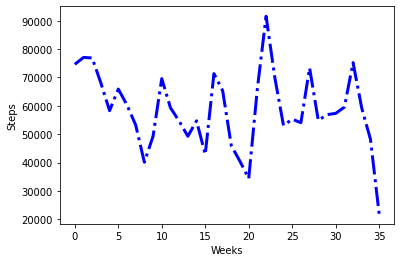

In [18]:
plt.plot(W1['Steps (count)'], color = 'blue', linewidth=3, linestyle='-.')
plt.xlabel("Weeks")
plt.ylabel("Steps")
plt.show()

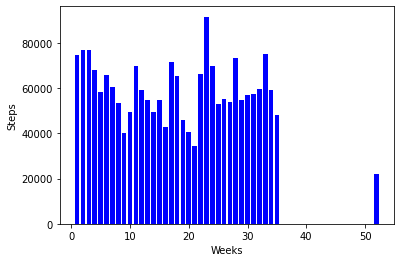

In [19]:
plt.bar(W1['week'],W1['Steps (count)'], color = 'blue', linewidth=3, linestyle='-.')
plt.xlabel("Weeks")
plt.ylabel("Steps")
plt.show() 

(array([-5.,  0.,  5., 10., 15., 20., 25., 30., 35., 40.]),
 <a list of 10 Text major ticklabel objects>)

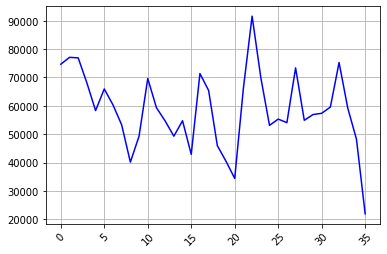

In [20]:
fig, ax = plt.subplots()
ax.grid(True)
plt.plot(W1.index, W1['Steps (count)'], c='blue')
plt.xticks(rotation=45)

How does week-to-week steps affect by the rainfall ?

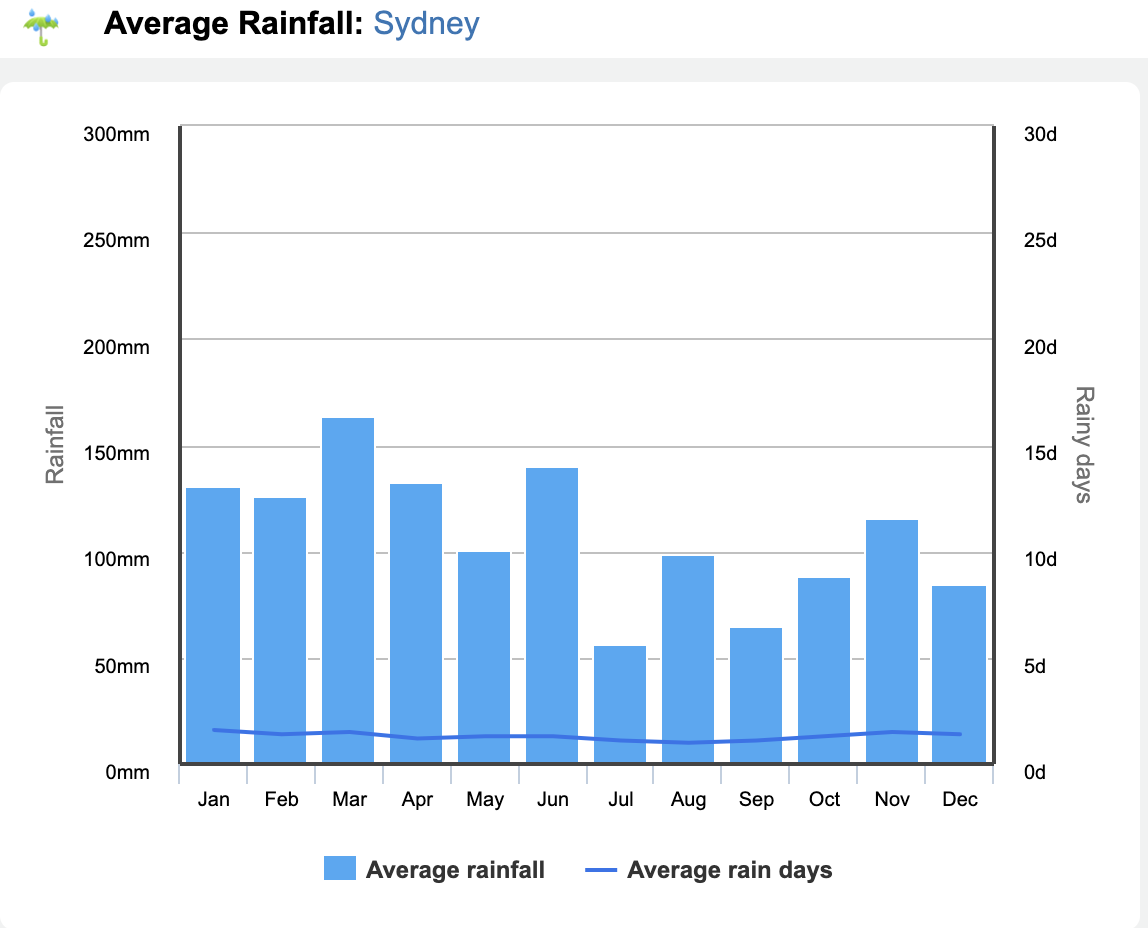

As through the graph of average rainfall,I find that in Mar and jun there are more rainfall and compare with the steps graph from week 9 to week 12, week 24 to week 27 there are slight drap in steps count and in week 16 which have a significant down may caused by the rainfall. At last we can see the rainfall graph have similar pattern with the steps count graph, So we guees there exist a relationship between them.